In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import os


#load the files from clean data
file_names = os.listdir('clean_data')
print(file_names)

['22_salon.csv', '22_puffs.csv', '.gitkeep', '24.csv', 'cibersec.csv', '13.csv', '23.csv', '14.csv']


In [7]:
# ['22_salon.csv', '22_puffs.csv', '.gitkeep', '24.csv', 'cibersec.csv', '13.csv', '23.csv', '14.csv'
# load the data for groups that start with 1 and add a column for the group name (0,1,2)

merged_dfs = []

df_cibersec = pd.read_csv('clean_data/cibersec.csv')
df_cibersec['group'] = 0
merged_dfs.append(df_cibersec)

for file_name in file_names:
	if file_name.startswith('1'):
		df = pd.read_csv('clean_data/' + file_name)
		df['group'] = 1
		merged_dfs.append(df)
	elif file_name.startswith('2'):
		df = pd.read_csv('clean_data/' + file_name)
		df['group'] = 2
		merged_dfs.append(df)
merged = pd.concat(merged_dfs)
print(merged.shape)

(226, 3)


In [19]:
# head of merged
print(merged.head())
# save merged in clean_data as merged.csv
merged.to_csv('clean_data/merged.csv', index=False)

   signal  group
0     -38      0
1     -37      0
2     -43      0
3     -36      0
4     -36      0


Text(0.5, 1.0, 'signal by group')

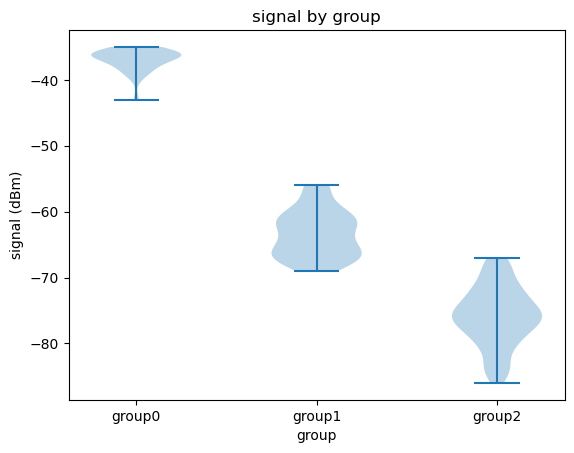

In [22]:
#plot groups in a violin plot separated by group
group1 = merged[merged['group'] == 1]
group2 = merged[merged['group'] == 2]
group0 = merged[merged['group'] == 0]
plt.violinplot([group0['signal'], group1['signal'], group2['signal']])
plt.xticks([1,2,3], ['group0', 'group1', 'group2'])
plt.ylabel('signal (dBm)')
plt.xlabel('group')
plt.title('signal by group')

In [30]:
#try linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = merged['signal'].values
y = merged['group'].values
# transform y to characters
y = y.astype(str)
X = X.reshape(-1,1)
clf = LinearDiscriminantAnalysis()
clf.fit(X,y)
# show metrics
print('accuracy: ', clf.score(X,y))
print('coefficients: ', clf.coef_)
#print boundary
print('boundary: ', clf.intercept_)



accuracy:  0.9513274336283186
coefficients:  [[ 1.89895935]
 [ 0.21673501]
 [-0.58094068]]
boundary:  [ 96.48283151  12.79545769 -41.9410501 ]


[-100.          -99.92992993  -99.85985986  -99.78978979  -99.71971972
  -99.64964965  -99.57957958  -99.50950951  -99.43943944  -99.36936937
  -99.2992993   -99.22922923  -99.15915916  -99.08908909  -99.01901902
  -98.94894895  -98.87887888  -98.80880881  -98.73873874  -98.66866867
  -98.5985986   -98.52852853  -98.45845846  -98.38838839  -98.31831832
  -98.24824825  -98.17817818  -98.10810811  -98.03803804  -97.96796797
  -97.8978979   -97.82782783  -97.75775776  -97.68768769  -97.61761762
  -97.54754755  -97.47747748  -97.40740741  -97.33733734  -97.26726727
  -97.1971972   -97.12712713  -97.05705706  -96.98698699  -96.91691692
  -96.84684685  -96.77677678  -96.70670671  -96.63663664  -96.56656657
  -96.4964965   -96.42642643  -96.35635636  -96.28628629  -96.21621622
  -96.14614615  -96.07607608  -96.00600601  -95.93593594  -95.86586587
  -95.7957958   -95.72572573  -95.65565566  -95.58558559  -95.51551552
  -95.44544545  -95.37537538  -95.30530531  -95.23523524  -95.16516517
  -95.

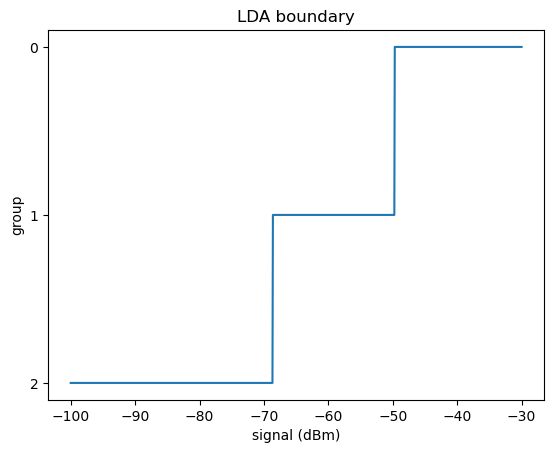

In [57]:
# linspace from -100 to -30
x = np.linspace(-100, -30, 1000)
# plot the groups
plt.plot(x, clf.predict(x.reshape(-1,1)))
print(x)
plt.title('LDA boundary')
plt.xlabel('signal (dBm)')
plt.ylabel('group')
plt.show()

In [58]:
#store the model in a pickle file
with open('stored_models/lda.pkl', 'wb') as f:
	pickle.dump(clf, f)